# NA AWS WYTRNOWAC DLA TESTU

In [ ]:
ffrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/gpt2_preprocess/data_table.csv"

In [ ]:
import pandas as pd 

data_path = "/content/drive/MyDrive/gpt2_preprocess/data_table.csv"
df = pd.read_csv(data_path)
df = df.drop("Unnamed: 0", axis=1)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,album,artist,lyrics,tittle,year,source,lyrics_length
0,v6,1z2,(1z2)\nrap - zycia ornament\nrodzina to fundam...,absolutnie,2001-08-21,1,3548
1,puzzle,2sty,"\n[verse 1: 2sty]\nyo, czemu tule wiare i zaci...",boje sie,NaN,1,2274
2,stej flaj,2sty,"\n[refren: balagane]\nkuchnie swiata, wpierdal...",kuchnie swiata,NaN,1,2131
3,stej flaj,2sty,"\n[zwrotka 1: 2sty]\nlubie jesc, lubie spac, l...",lubie,2014-11-10,1,1846
4,NaN,2sty,2sty:\nsiedze na chacie choc mialem wpasc pomo...,multiscreening,2018-02-01,1,1582
...,...,...,...,...,...,...,...
70365,NaN,nag,cmentarna brama jest juz od dawna zamknieta\ni...,cmentarna brama,NaN,3,4041
70366,NaN,guernica y luno,jak zamknac morde strajkujacym w szpitalach\nj...,hymn mi,NaN,3,4516
70367,NaN,peja,dzielne chlopaki z nadmorskiego miasta zawsze ...,arka gdynia rugby,NaN,3,3610
70368,NaN,trzeci wymiar,"wille, pakty, konta, jachty, whisky, kontakty,...",pogoda dla bogaczy,NaN,3,3460


# Znajdz glowny jezyk w jakim jest nutka
[transformer xlm-roberta](https://huggingface.co/papluca/xlm-roberta-base-language-detection?text=I+like+you.+I+love+you)

In [ ]:
def find_language()

SyntaxError: ignored

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 10.8 MB/s 
     |████████████████████████████████| 6.6 MB 44.5 MB/s 
     |████████████████████████████████| 596 kB 56.6 MB/s 
     |████████████████████████████████| 101 kB 5.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers

input = ""

In [ ]:
from transformers import AutoTokenizer

checkpoint = "papluca/xlm-roberta-base-language-detection"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
raw_inputs = [
    "siedze na chacie choc mialem wpasc",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[    0,  1329, 23586,    24,  1608,  1474,   681,   238,   324, 75040,
           148,  3166,   238,     2],
        [    0,    87, 35463,   903,   221,  5045,    38,     2,     1,     1,
             1,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}


In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at papluca/xlm-roberta-base-language-detection were not used when initializing XLMRobertaModel: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaModel were not initialized from the model checkpoint at papluca/xlm-roberta-base-language-detection and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use 

In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 14, 768])


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [ ]:
print(outputs.logits.shape)

torch.Size([2, 20])


In [ ]:
print(outputs.logits)

tensor([[-1.5852e+00, -7.2880e-01, -2.6092e-01,  7.8991e+00, -1.6358e-01,
         -7.3762e-02, -5.2073e-01, -5.0213e-01,  4.8695e-03, -8.4412e-01,
          1.6155e-01, -3.9485e-01,  4.8881e-01, -1.3631e+00, -7.6270e-01,
         -5.2686e-01, -4.2162e-01, -5.6037e-01, -7.0815e-01, -2.5556e-01],
        [ 4.8468e-02, -9.0196e-03, -1.2220e+00, -1.0878e+00, -3.5049e-01,
         -6.3525e-01, -6.7089e-01, -1.0007e-01, -5.9778e-02, -8.1550e-01,
         -1.8282e-01,  3.5388e-01, -9.3105e-01,  7.7831e+00, -2.0158e-01,
         -5.4978e-01, -2.8180e-01, -3.2720e-01, -2.8923e-01,  8.9511e-02]],
       grad_fn=<AddmmBackward0>)


In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[7.5662e-05, 1.7816e-04, 2.8446e-04, 9.9514e-01, 3.1354e-04, 3.4301e-04,
         2.1938e-04, 2.2349e-04, 3.7107e-04, 1.5876e-04, 4.3401e-04, 2.4880e-04,
         6.0204e-04, 9.4483e-05, 1.7223e-04, 2.1803e-04, 2.4223e-04, 2.1085e-04,
         1.8188e-04, 2.8599e-04],
        [4.3486e-04, 4.1056e-04, 1.2206e-04, 1.3959e-04, 2.9180e-04, 2.1949e-04,
         2.1180e-04, 3.7483e-04, 3.9024e-04, 1.8329e-04, 3.4506e-04, 5.9018e-04,
         1.6328e-04, 9.9417e-01, 3.3865e-04, 2.3907e-04, 3.1254e-04, 2.9867e-04,
         3.1023e-04, 4.5307e-04]], grad_fn=<SoftmaxBackward0>)


In [ ]:
torch.argmax(predictions)

tensor([ 3, 13])

In [ ]:
torch.argmax(predictions[1])

tensor(13)

In [ ]:
model.config.id2label

{0: 'ja',
 1: 'nl',
 2: 'ar',
 3: 'pl',
 4: 'de',
 5: 'it',
 6: 'pt',
 7: 'tr',
 8: 'es',
 9: 'hi',
 10: 'el',
 11: 'ur',
 12: 'bg',
 13: 'en',
 14: 'fr',
 15: 'zh',
 16: 'ru',
 17: 'th',
 18: 'sw',
 19: 'vi'}

In [ ]:
def get_predicition_from_output(output):
    preds = torch.argmax(predictions, dim=1)
    for element in preds:
        print(model.config.id2label[int(element)])
get_predicition_from_output(predictions)

pl
en


In [ ]:
def add_language_column(df):

    df['lnaguage'] = get_predicition_from_output(df['lyrics'])

def predict_from_text(row):
    raw_inputs = row['lyrics']
    inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    preds_final = torch.argmax(predictions)
    language = model.config.id2label[int(preds_final)]
    return language
    #new_column = torch.zeros(len(preds_final))
    #for idx, element in enumerate(preds_final):
    #    new_column[idx] = model.config.id2label[int(element)]
    #return df



In [ ]:
import transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"

checkpoint = "papluca/xlm-roberta-base-language-detection"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint).to(device)


In [ ]:
> 
> sentence  = 'Hello World!'
> tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
> model     = BertModel.from_pretrained('bert-large-uncased')

> inputs    = tokenizer(sentence, return_tensors="pt").to(device)
> model     = model.to(device)
> outputs   = model(**inputs)

In [ ]:
df_test = df[:10]
df_test

,album,artist,lyrics,tittle,year,source,lyrics_length
0,v6,1z2,(1z2)\nrap - zycia ornament\nrodzina to fundam...,absolutnie,2001-08-21,1,3548
1,puzzle,2sty,"\n[verse 1: 2sty]\nyo, czemu tule wiare i zaci...",boje sie,NaN,1,2274
2,stej flaj,2sty,"\n[refren: balagane]\nkuchnie swiata, wpierdal...",kuchnie swiata,NaN,1,2131
3,stej flaj,2sty,"\n[zwrotka 1: 2sty]\nlubie jesc, lubie spac, l...",lubie,2014-11-10,1,1846
4,NaN,2sty,2sty:\nsiedze na chacie choc mialem wpasc pomo...,multiscreening,2018-02-01,1,1582
5,puzzle,2sty,\n[scratch: 2sty]\nto styl z najwyzszej polki\...,napierdalam jak chce,NaN,1,1737
6,NaN,2sty,"\n[intro: 2sty]\nno siema, witam, sluchaj\ntak...",napierdalam kebab,2014-08-04,1,1785
7,puzzle,2sty,"\n[scratch:x1]\nmam charakter, ktorego nie zdo...",nie umiem byc inny,NaN,1,2342
8,NaN,2sty,"nosze roshe, zostawiam slady niby brud smrod i...",nie zobaczysz,NaN,1,2191
9,stej flaj,2sty,\n[intro: 2sty]\njestem normalnym gosciem\nlub...,normalny gosc,2014-11-03,1,2018


In [ ]:
def predict_from_text(row):
    raw_inputs = row['lyrics']
    try:
        #print(str(raw_inputs[:10]))
        raw_inputs = str(raw_inputs)
    except:
        print(row)
        raw_inputs = 'None'
    inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt").to(device)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    preds_final = torch.argmax(predictions)
    language = model.config.id2label[int(preds_final)]
    print(language)
    return language
    #new_column = torch.zeros(len(preds_final))
    #for idx, element in enumerate(preds_final):
    #    new_column[idx] = model.config.id2label[int(element)]
    #return df


In [ ]:
df_test['language'] = df_test.apply(lambda row: predict_from_text(row), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test

,album,artist,lyrics,tittle,year,source,lyrics_length,language
0,v6,1z2,(1z2)\nrap - zycia ornament\nrodzina to fundam...,absolutnie,2001-08-21,1,3548,pl
1,puzzle,2sty,"\n[verse 1: 2sty]\nyo, czemu tule wiare i zaci...",boje sie,NaN,1,2274,pl
2,stej flaj,2sty,"\n[refren: balagane]\nkuchnie swiata, wpierdal...",kuchnie swiata,NaN,1,2131,pl
3,stej flaj,2sty,"\n[zwrotka 1: 2sty]\nlubie jesc, lubie spac, l...",lubie,2014-11-10,1,1846,pl
4,NaN,2sty,2sty:\nsiedze na chacie choc mialem wpasc pomo...,multiscreening,2018-02-01,1,1582,pl
5,puzzle,2sty,\n[scratch: 2sty]\nto styl z najwyzszej polki\...,napierdalam jak chce,NaN,1,1737,pl
6,NaN,2sty,"\n[intro: 2sty]\nno siema, witam, sluchaj\ntak...",napierdalam kebab,2014-08-04,1,1785,pl
7,puzzle,2sty,"\n[scratch:x1]\nmam charakter, ktorego nie zdo...",nie umiem byc inny,NaN,1,2342,pl
8,NaN,2sty,"nosze roshe, zostawiam slady niby brud smrod i...",nie zobaczysz,NaN,1,2191,pl
9,stej flaj,2sty,\n[intro: 2sty]\njestem normalnym gosciem\nlub...,normalny gosc,2014-11-03,1,2018,pl


In [ ]:
df['language'] = df.apply(lambda row: predict_from_text(row), axis=1)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
nl
nl
nl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
es
pl
pl
hi
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
en
pl
pl
pl
en
pl
pl
pl
pl
en
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
pl
en
pl
pl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70370 entries, 0 to 70369
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   album          12023 non-null  object
 1   artist         70370 non-null  object
 2   lyrics         70369 non-null  object
 3   tittle         70327 non-null  object
 4   year           11938 non-null  object
 5   source         70370 non-null  int64 
 6   lyrics_length  70370 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.8+ MB


In [ ]:
df.dtypes

album            object
artist           object
lyrics           object
tittle           object
year             object
source            int64
lyrics_length     int64
dtype: object

In [ ]:
if df.dtypes['lyrics'] == float:
    print("Data type of column 'Name' is object")

In [ ]:
a = 7.5
print(str(a))

7.5


In [ ]:
df

,album,artist,lyrics,tittle,year,source,lyrics_length,language
0,v6,1z2,(1z2)\nrap - zycia ornament\nrodzina to fundam...,absolutnie,2001-08-21,1,3548,pl
1,puzzle,2sty,"\n[verse 1: 2sty]\nyo, czemu tule wiare i zaci...",boje sie,NaN,1,2274,pl
2,stej flaj,2sty,"\n[refren: balagane]\nkuchnie swiata, wpierdal...",kuchnie swiata,NaN,1,2131,pl
3,stej flaj,2sty,"\n[zwrotka 1: 2sty]\nlubie jesc, lubie spac, l...",lubie,2014-11-10,1,1846,pl
4,NaN,2sty,2sty:\nsiedze na chacie choc mialem wpasc pomo...,multiscreening,2018-02-01,1,1582,pl
...,...,...,...,...,...,...,...,...
70365,NaN,nag,cmentarna brama jest juz od dawna zamknieta\ni...,cmentarna brama,NaN,3,4041,pl
70366,NaN,guernica y luno,jak zamknac morde strajkujacym w szpitalach\nj...,hymn mi,NaN,3,4516,pl
70367,NaN,peja,dzielne chlopaki z nadmorskiego miasta zawsze ...,arka gdynia rugby,NaN,3,3610,pl
70368,NaN,trzeci wymiar,"wille, pakty, konta, jachty, whisky, kontakty,...",pogoda dla bogaczy,NaN,3,3460,pl


In [ ]:
df.to_csv("data_english.csv")

In [ ]:
!cp /content/data_english.csv /content/drive/MyDrive/gpt2_preprocess

# Wziac 

1. tittle ten sam
2. olabelowac sobie takie same lyrics rzne o np. lirtere
3. osadzic w latent space
4. algorytm/tresyhold do znajdywania duplikatow

In [ ]:
!pip install transformers
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 42.9 MB/s 
     |████████████████████████████████| 101 kB 12.4 MB/s 
     |████████████████████████████████| 596 kB 67.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 1.2 MB 10.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c4247a1350c3c723b1c48b49647560160730489ca59624024725c6fa83f9feeb
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built s

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is an example sentence"]

model = SentenceTransformer('Pyjay/sentence-transformers-multilingual-snli-v2-500k')
embeddings = model.encode(sentences)
print(embeddings)


[[ 0.16712797  0.03942368 -0.0113686  ... -0.12893087  0.06455725
   0.25955874]
 [ 0.02298269  0.0535984  -0.06849083 ... -0.24499622  0.24159293
   0.16509439]]


In [ ]:
embeddings[0]

In [ ]:
import numpy as np
print(len(embeddings))
input1 = embeddings[0]
input2 = embeddings[1]
print(input1.shape)

2
(768,)


In [ ]:
print(type(embeddings))

<class 'numpy.ndarray'>


In [ ]:
import torch
import torch.nn as nn

# find distance using  cosine similarity or euclidan distance

def cosine_similarity(input1, input2):
    tensor1 = torch.tensor(input1)
    tensor2 = torch.tensor(input2)
    cos = nn.CosineSimilarity(dim=0)
    output = cos(tensor1, tensor2)
    return output

score = cosine_similarity(input1, input2)
print(score)

tensor(0.7635)


# rozwiazanie mojego problelmu
https://www.researchgate.net/post/Determination-of-threshold-for-cosine-similarity-score



```
Nikola, I agree with Bastian, Peter, and Pascal. As Peter pointed out, "the best way is to have some sample data with which you
can set a threshold based on your space and your task".
The reason is that cosine similarities depend very much on your domain structure.
Here is how you can do this:
STEP 1: Randomly identify a small sample of documents. 50 may be enough,
100 is better, and so forth. 
STEP 2: Compute cosine similarities (CSS) between your query document 
(or documents, if you have more than one) and all 100 documents in your sample. 
STEP 3: For each of the 100 comparisons, use human assistants to obtain subjective relevance. 
The subjects can be students who do this for extra credit, friends who are
helping you out, a "crowd" of m-Turkers if you decide to crowdsource it,
or, in the worst case, just yourself. Let's suppose you use 5 friends.
This will give you a data set of 100*5 = 500 rows.
For each row record the following variables: CSS (on a scale 0 to 1),
RaterID (say, 1 to 5), DocumentID (say, 1 to 100) and Relevant
(binary, 1 if relevant, 0 if not relevant). Make sure
the subjects do not see the CSS while they make the determination of
whether the query is "relevant" to the reference document.
STEP 4: Fit a statistical model that predicts a probability for relevant,
P(Relevant). 
STEP 4A: One posibility is to go with a Logistic Regression model.
Then you use "Relevant" as the response variable, and CSS as the predictor.
(Ideally you may also want to first include RaterID, dummy-coded,
using 4 dummy variables, as another predictor, and make sure it is
insignificant; this will confirm that the rater has no effect,
but you can skip this part if it is too much for your study).
After you fit the Logistic Regression model, you will have an equation
that produces predicted probability for "Relevant=1", given a CSS level.
STEP 4B: A second possibility is to go with a decision tree model.
This will create a set of if-then-else rules. All of them will have a
predicted probability for "relevant" query on the right-hand side.
STEP 5: Use your model to obtain predicted probabilities for all queries.
Those cases where Pred.Probab. > 0.5 are the ones that you should
classify as "relevant". Order your spreadsheet by increasing predicted
probability and look up the point where the probability switvhes from
less than 0.5 to greater than 0.5. Look up the corresponding CSS.
This is your empirical CSS threshold, validated by human subjects,
and estimated by a predictive model!
Good luck -- feel free to ask questions, such as what software to use,
example code, etc.
```

1. zebrac 100 sampli 50 takie same 50 rozne



# EDA zrobic

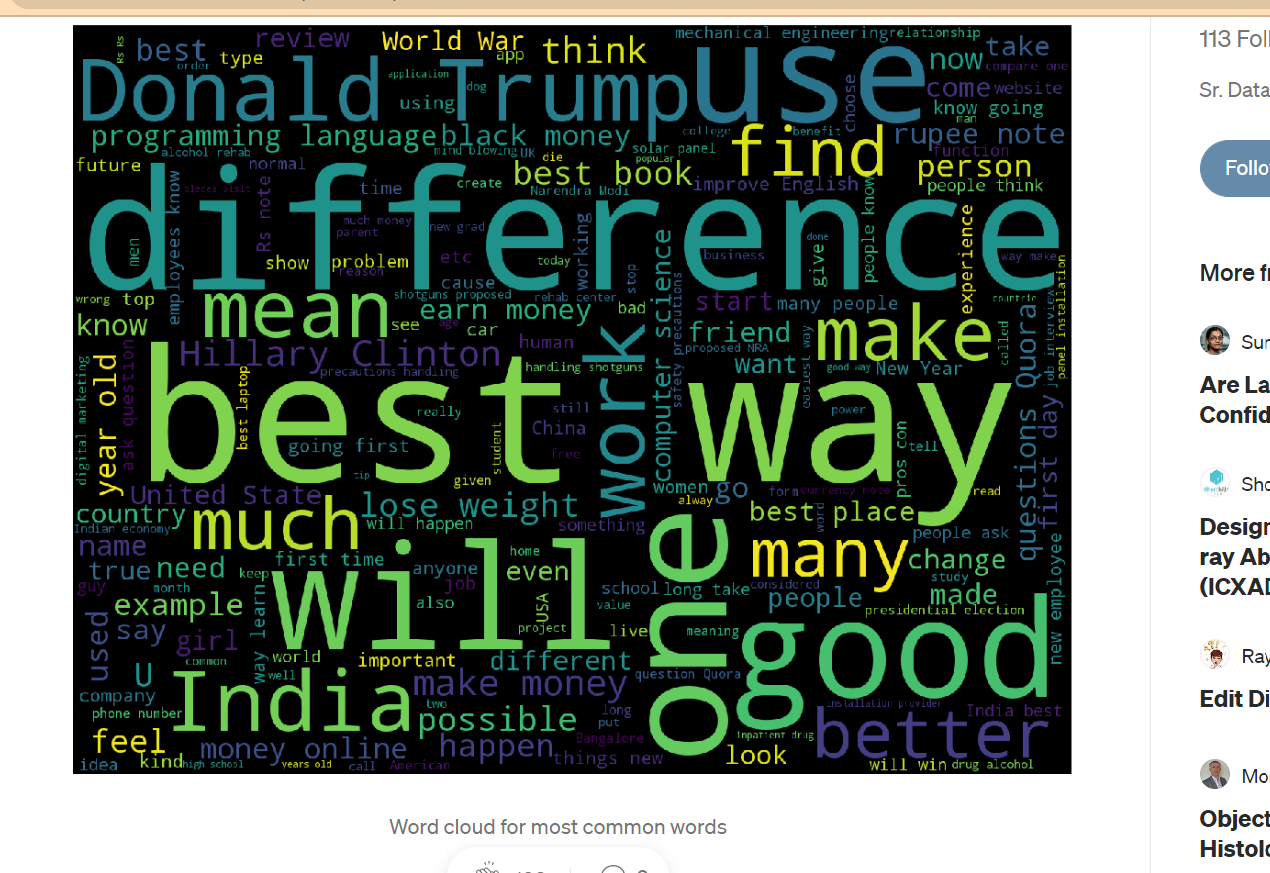

In [ ]:
import pandas as pd 

data_path = "/content/drive/MyDrive/gpt2_preprocess/data_english.csv"
df = pd.read_csv(data_path)
df = df.drop("Unnamed: 0", axis=1) # PRZY ZAPISYWANIU TO SIE USUWA
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,album,artist,lyrics,tittle,year,source,lyrics_length,language
0,v6,1z2,(1z2)\nrap - zycia ornament\nrodzina to fundam...,absolutnie,2001-08-21,1,3548,pl
1,puzzle,2sty,"\n[verse 1: 2sty]\nyo, czemu tule wiare i zaci...",boje sie,NaN,1,2274,pl
2,stej flaj,2sty,"\n[refren: balagane]\nkuchnie swiata, wpierdal...",kuchnie swiata,NaN,1,2131,pl
3,stej flaj,2sty,"\n[zwrotka 1: 2sty]\nlubie jesc, lubie spac, l...",lubie,2014-11-10,1,1846,pl
4,NaN,2sty,2sty:\nsiedze na chacie choc mialem wpasc pomo...,multiscreening,2018-02-01,1,1582,pl
...,...,...,...,...,...,...,...,...
70365,NaN,nag,cmentarna brama jest juz od dawna zamknieta\ni...,cmentarna brama,NaN,3,4041,pl
70366,NaN,guernica y luno,jak zamknac morde strajkujacym w szpitalach\nj...,hymn mi,NaN,3,4516,pl
70367,NaN,peja,dzielne chlopaki z nadmorskiego miasta zawsze ...,arka gdynia rugby,NaN,3,3610,pl
70368,NaN,trzeci wymiar,"wille, pakty, konta, jachty, whisky, kontakty,...",pogoda dla bogaczy,NaN,3,3460,pl


## DROP INNE NIZ PL

In [ ]:
df = df[df["language"].str.contains("pl") == True]
df = df.reset_index(drop=True)
df

,album,artist,lyrics,tittle,year,source,lyrics_length,language
0,v6,1z2,(1z2)\nrap - zycia ornament\nrodzina to fundam...,absolutnie,2001-08-21,1,3548,pl
1,puzzle,2sty,"\n[verse 1: 2sty]\nyo, czemu tule wiare i zaci...",boje sie,NaN,1,2274,pl
2,stej flaj,2sty,"\n[refren: balagane]\nkuchnie swiata, wpierdal...",kuchnie swiata,NaN,1,2131,pl
3,stej flaj,2sty,"\n[zwrotka 1: 2sty]\nlubie jesc, lubie spac, l...",lubie,2014-11-10,1,1846,pl
4,NaN,2sty,2sty:\nsiedze na chacie choc mialem wpasc pomo...,multiscreening,2018-02-01,1,1582,pl
...,...,...,...,...,...,...,...,...
60106,NaN,nag,cmentarna brama jest juz od dawna zamknieta\ni...,cmentarna brama,NaN,3,4041,pl
60107,NaN,guernica y luno,jak zamknac morde strajkujacym w szpitalach\nj...,hymn mi,NaN,3,4516,pl
60108,NaN,peja,dzielne chlopaki z nadmorskiego miasta zawsze ...,arka gdynia rugby,NaN,3,3610,pl
60109,NaN,trzeci wymiar,"wille, pakty, konta, jachty, whisky, kontakty,...",pogoda dla bogaczy,NaN,3,3460,pl


In [ ]:
df.to_csv("data_only_pl.csv", index=False)

In [ ]:
!cp /content/data_only_pl.csv /content/drive/MyDrive/gpt2_preprocess

In [ ]:
# UZYWAJAC FUZZY WORDS ZNALEZC PODOBNE LOPATOLOGICZNIE

df_duplicates = pd.concat(g for _, g in df.groupby("tittle") if len(g) > 1)
df_duplicates

,album,artist,lyrics,tittle,year,source,lyrics_length,language
7166,muzyka rozrywkowa,pezet,"\n[zwrotka 1: pezet]\ntu, skad pochodze, bog r...",#1,NaN,1,2430,pl
10679,NaN,tps,"\n[wejscie: tps]\nstreet autonomy, a jak\n\n[z...",#1,2022-05-20,1,2134,pl
650,NaN,bezczel,"1. \njedni mnie nie lubia, drudzy nienawidza, ...",#hot 16 challenge,NaN,1,715,pl
9472,NaN,szad akrobata,\n[verse 1: szad akrobata]\na moze zapytajmy g...,#hot 16 challenge,2014-09-13,1,1950,pl
321,NaN,avi (pol),"napis na poczatku klipu:\nmt 6, 3-4\nkiedys si...",#hot16challange2,2020-05-07,1,830,pl
...,...,...,...,...,...,...,...,...
38559,NaN,nieznany,1. jeszcze tylko kilka niedziel\njeszcze dwa m...,zywioly,NaN,2,504,pl
9806,marmur,taco hemingway,"\n[zwrotka 1: taco hemingway]\ndla tych, ktorz...",zywot,2016-11-03,1,5559,pl
51111,NaN,taco hemingway,"dla tych, ktorzy tak koniecznie chca biografii...",zywot,NaN,3,5536,pl
2268,eternia,eldo,\n[zwrotka 1: eldo]\nwchodze w ten gaszcz z do...,zza szyby,2003-09-13,1,2122,pl


In [ ]:
df_duplicates[:20]

,album,artist,lyrics,tittle,year,source,lyrics_length,language
7166,muzyka rozrywkowa,pezet,"\n[zwrotka 1: pezet]\ntu, skad pochodze, bog r...",#1,NaN,1,2430,pl
10679,NaN,tps,"\n[wejscie: tps]\nstreet autonomy, a jak\n\n[z...",#1,2022-05-20,1,2134,pl
650,NaN,bezczel,"1. \njedni mnie nie lubia, drudzy nienawidza, ...",#hot 16 challenge,NaN,1,715,pl
9472,NaN,szad akrobata,\n[verse 1: szad akrobata]\na moze zapytajmy g...,#hot 16 challenge,2014-09-13,1,1950,pl
321,NaN,avi (pol),"napis na poczatku klipu:\nmt 6, 3-4\nkiedys si...",#hot16challange2,2020-05-07,1,830,pl
53706,NaN,romantyczny,"witam was wszystkich, moj pseudonim to romanty...",#hot16challange2,NaN,3,661,pl
85,NaN,abel (pol),\n[zwrotka: abel (pol)]\nnominacja rapem – bra...,#hot16challenge,2014-09-15,1,1058,pl
550,NaN,bedoes,"to jest hot 16 challenge, daj mi w chuj stript...",#hot16challenge,2014-09-15,1,939,pl
860,NaN,bialas,"\n[intro: bialas]\njol, tutaj beezy, \ndzieki ...",#hot16challenge,2014-09-02,1,882,pl
1743,NaN,diox,"dzieki za bit, lanek, jest kozak, naprawde, ko...",#hot16challenge,2014-09-03,1,1106,pl


In [ ]:

df_duplicates = df_duplicates[df_duplicates["tittle"].str.contains("#hot16challenge") == False]

In [ ]:
df_duplicates[750:800]

,album,artist,lyrics,tittle,year,source,lyrics_length,language
38949,NaN,offensywa,"1.czasami nie slysze bo tak jest prosciej, pro...",antidotum,NaN,2,636,pl
52914,NaN,dudek p56,moje zycie przeznaczone\r\npo to by grac\r\npo...,antidotum,NaN,3,2641,pl
57860,NaN,nokaut,jak antidotum na moj bol\r\nchce miec cie przy...,antidotum,NaN,3,957,pl
38819,NaN,obled,"czesto sie zastanawiam, co to jest antifa\nska...",antifa,NaN,2,629,pl
40384,NaN,pidzama porno,mijamy sie nie widzac wzajem\nczego innego wyp...,antifa,NaN,2,338,pl
25092,NaN,homo twist,cos ujal w planie\nantoni radwanie\ncozes zazy...,antoni radwan,NaN,2,1594,pl
33355,NaN,maciej malenczuk,cos ujal w planie\nantoni radwanie\ncozes zazy...,antoni radwan,NaN,2,1349,pl
37821,NaN,nagly atak spawacza,yo skurwysyny wy glupie kutasy\nwy kurwy jeban...,anty liroy,NaN,2,4015,pl
40123,NaN,peja,yo skurwysyny wy glupie kutasy\nwy kurwy jeban...,anty liroy,NaN,2,4034,pl
54134,NaN,nag,yo skurwysyny wy glupie kutasy wy kurwy jebane...,anty liroy,NaN,3,4040,pl


In [ ]:
# zostawiac z date_class 1 potem 2 potem 3 
# zostawiac dluzsze czy krotsze ?

# Mam ~ 100 par (takie same) LABEL: 1
# ZROBIC 100 par (ROZNE)     LABEL: 0 

In [ ]:
# torch dataloader for embedding extraction se zrobic


In [ ]:
!cp /content/drive/MyDrive/gpt2_preprocess/data_only_pl.csv .

In [ ]:
!pip install transformers
!pip install -U sentence-transformers

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd

In [ ]:



class GiveLyricsAndIndex(Dataset):
    def __init__(self, csv_path):
        self.df = pd.read_csv(csv_path)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        '''
        In: df
        Out: lyrics and index
        '''
        lyrics = self.df.loc[idx].lyrics # rows.lyrics
        return lyrics, idx

data = GiveLyricsAndIndex("data_only_pl.csv")
dataloader = DataLoader(data, batch_size=1, shuffle=False)

#test_dataset = data[:500]

In [ ]:
class TestGiveLyricsAndIndex(Dataset):
    def __init__(self, csv_path):
        self.df = pd.read_csv(csv_path)
        self.df = self.df[:500]
    def __len__(self):
        return 500

    def __getitem__(self, idx):
        '''
        In: df
        Out: lyrics and index
        '''
        lyrics = self.df.loc[idx].lyrics # rows.lyrics
        return lyrics, idx

test_data = TestGiveLyricsAndIndex("data_only_pl.csv")
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

In [ ]:
print(len(test_data))

500


In [ ]:
exapmle_lyrics = data[69][0]
exapmle_lyrics

'\n[verse 1: abel (pol)]\nmowia mi abel – ostatni sarmata.\n wchodze na bit, to trip dookola swiata\ndni osiemdziesiat\n. \nprzystanek slubice\n. nie ma tego zlego co na dobre czegos, znow nie kaze mi wykrzyczec\nniebo to granice. skoro tak to fruwam po orbicie \ni kiedy skacze w dol\n \nredbull mi nie dodaje skrzydel\na jedyne czego chce to miekkie ladowanie, dlatego kiedy robie rap wybieram nie cpanie, a prace i talent. oni mowia mi: „zwariowales ?” a ja mam to w dupie i robie to dalej. nawet kiedy nigdy powiedziec nie bede mogl – wygralem.  nikt nie bedzie wytyczal mi drog – sam je wybralem\npare lat wstecz i dalej ide taranem. wypracowane metody, dla ciebie to schody, rownasz do podlogi, niebawem obudzisz sie w kanale. dla mnie to obcowanie ze swietym graalem. alleluja!\nczuc tu cud! spiritus sanctus od stop do czubka glowy. czujesz dreszcze i wiesz, ze wlasnie ten styl jest unikatowy!\n\n[hook: abel (pol)]\nabel! robie to tak! robie to niebywale. wtedy kiedy inni chca robic hajs, 

In [ ]:
print(len(data))

60111


In [ ]:
data[60110][0]

In [ ]:
batch = next(iter(dataloader))

In [ ]:
batch

[('(1z2)\nrap - zycia ornament\nrodzina to fundament\nsamo zycie, mankament\nw nim slabostka, zachcianka\ndrobnostka, rozterka, omylka\ndzis odpadli, ostatki\nwierzysz w to, ze jutro\nrozmach i wzrost\nze spelni sie to co chcesz?\nze juz nie zrani zadna infekcja, zaden post\nczujesz paraliz, masz to cos?\nczy negliz? czy tak jak ja\nco dzien sie pieklisz?\ni czy potrafisz naprawde uczuciem kogos darzyc?\nprzezyc, marzyc, caly czas wierzyc\nbo proste, ze nie milioner, proste, ze wizjoner\nproste, ze w tej ciaglej szamotaninie\ncos sie rodzi, rozwija, cos w zarodku ginie\nfuriat - nie tylko ja tak mam na imie\nspelnienie zamroczy mnie czy pozwoli dobrze zyc?\nnie chce z furii non-stop wyc\nzdrowo, szczerze z duma isc\ni to wazne\nnie tylko dzis, wazne, jak komfort zycia\nchodze troche wyzej, musze byc dobrej mysli\ntego co kocham blizej, bo albo zatriumfuje, albo tylko sie oblize\n(1z2)\nzycie nie faworyzuje, wiekszosc sie marnuje\nna innych zeruje, po trochu sie zatraca\nktos sie zagapi

In [ ]:
batch[1]

tensor([0])

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('Pyjay/sentence-transformers-multilingual-snli-v2-500k')
embeddings = model.encode(exapmle_lyrics)
print(embeddings)
print(embeddings.shape)

In [ ]:
type(embeddings)

numpy.ndarray

# Zrobis osadzenia i model porownawczy dla roznych transformatorow neuronowych

In [ ]:
from transformers import AutoTokenizer, AutoModel

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained('Pyjay/sentence-transformers-multilingual-snli-v2-500k')
model = AutoModel.from_pretrained('Pyjay/sentence-transformers-multilingual-snli-v2-500k').to(device)



In [ ]:
# extract embeddings models on ! pytorch !

import torch



def extract_embeddings(dataloader, model, tokenizer, latent_space_dim=768):
    '''
    Change labels to indexes ! 

    index i indexes tu uzywam nie pomylic


    HAVE TO WORK ON EACH DEVICE GPU I CPU

    '''
    with torch.no_grad():
        model.eval()
        embeddings = torch.zeros((len(dataloader.dataset), latent_space_dim)).to(device)
        indexes = torch.zeros(len(dataloader.dataset)).to(device)
        k = 0
        for lyrics, index in dataloader: # datalaoder zwraca jako [(string,) idx]
            sentences = lyrics[0][0] 
            index = index.to(device)
            encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt').to(device)
            model_output = model(**encoded_input)
            sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
            embeddings[k:k+len(lyrics)] = sentence_embeddings
            indexes[k:k+len(lyrics)] = index
            k += len(lyrics)
    return embeddings, indexes

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


In [ ]:
embeddings, indexes = extract_embeddings(test_dataloader, model, tokenizer)

In [ ]:
embeddings.shape

torch.Size([500, 768])

In [ ]:
 def get_embeddings(): # 768 hidden size
    from sentence_transformers import SentenceTransformer
    sentences = ["This is an example sentence", "Each sentence is converted"]

    model = SentenceTransformer('Pyjay/sentence-transformers-multilingual-snli-v2-500k')
    embeddings = model.encode(sentences)
    print(embeddings)
get_embeddings()

# get hiiden size of model

In [ ]:
# ZNAJDZ RECZNIE POWTORZENIA
import pandas as pd

df = pd.read_csv("data_only_pl.csv")

In [ ]:
df_duplicates = pd.concat(g for _, g in df.groupby("tittle") if len(g) > 1)
df_duplicates = df_duplicates[df_duplicates["tittle"].str.contains("#hot16challenge") == False]

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
df_duplicates[500:800] # iter by 50

,album,artist,lyrics,tittle,year,source,lyrics_length,language
55120,NaN,jacek kaczmarski,"w malym palcu klawiature mam,chociaz nie lubil...",akompaniator,NaN,3,2127,pl
16568,NaN,big dance,"gdy letnia noca ptakow spiew,\nszum fal bijacy...",akropolis adieu,NaN,2,600,pl
30138,NaN,kis lech stawski,"w atenach wstaje nowy dzien,\nruiny swiatyn bu...",akropolis adieu,NaN,2,730,pl
9245,pokoj zero,solar,\n[zwrotka 1: solar]\nakuku! zawsze skradam si...,akuku,2019-09-20,1,2034,pl
10491,hello baby,ten typ mes,(mes z offu: dajcie mi wszyscy spokoj!)\n\n[zw...,akuku,2021-09-23,1,1168,pl
33352,NaN,maciej malenczuk,kto w alabama do noemi trafi\nz bawelny ponczo...,alabama,NaN,2,967,pl
49106,NaN,wieslawa drojecka,kto w alabama - do noemi trafi\nz bawelny ponc...,alabama,NaN,2,720,pl
16061,NaN,bertolt brecht,"och, wskaz mi te droge, tam gdzie jest whisky ...",alabama song,NaN,2,1049,pl
29557,NaN,katarzyna groniec,ach ludzie raz dwa\ngdzie tu jest jakis bar\nn...,alabama song,NaN,2,765,pl
8247,w samo poludnie,reto,"\n[zwrotka 1: reto]\nile zobaczyles zla, a ile...",alarm,2021-10-01,1,2339,pl


In [ ]:
'''
ODZIELNY DATASET STWORZYC


100 par similiart
100 par niesimiliar

sprawdzic accuracy na tej podstawei i ustawic treshold !
'''

import pandas as pd

df = pd.read_csv("data_only_pl.csv")

In [ ]:
!cp /content/drive/MyDrive/gpt2_preprocess/Powtorzenia.txt .

In [ ]:
text_path = 'Powtorzenia.txt'


def make_dataset(text_path=text_path):
    '''

    '''
    with open(text_path) as f:
        lines = f.readlines()

    df_empty = pd.DataFrame(columns=["idx_1", "idx_2", "is_duplicate"])

    for i in range(0,360):
        if lines[i] != "\n" and lines[i+1] != "\n" and lines[i+2] == "\n":
            df_empty.loc[i] = [lines[i].replace("\n", ""),lines[i+1].replace("\n", ""),1]


    return df_empty



df_all_duplicates = make_dataset()
df_all_duplicates = df_all_duplicates.reset_index(drop=True)
df_all_duplicates

,idx_1,idx_2,is_duplicate
0,12322,55210,1
1,9395,59495,1
2,533,54316,1
3,37797,59579,1
4,6394,41442,1
...,...,...,...
106,47109,48122,1
107,27972,35117,1
108,6063,39257,1
109,29559,36229,1


In [ ]:
import random

random.seed(10)

In [ ]:
def make_dataset_not_duplicates():
    '''
    ASSUMPTION
    take random inexes and make not duplicates from them
    '''
    list_to_process = random.sample(range(60000), 222)
    polowa = int(len(list_to_process)/2)
    list_1 = list_to_process[:polowa]
    list_2 = list_to_process[polowa:]
    labels = [0] * 111
    df = pd.DataFrame (list_1, columns = ['idx_1'])
    df["idx_2"] = list_2
    df["is_duplicate"] = labels
    return df

df_all_non_duplicates = make_dataset_not_duplicates()
df_all_non_duplicates

,idx_1,idx_2,is_duplicate
0,10068,17276,0
1,48473,26513,0
2,15554,28943,0
3,21172,41910,0
4,40574,22382,0
...,...,...,...
106,19267,22636,0
107,33194,10766,0
108,32728,2040,0
109,33261,47376,0


In [ ]:
df_find_threshold = pd.concat([df_all_duplicates, df_all_non_duplicates], axis=0).sample(frac=1).reset_index(drop=True)
df_find_threshold

,idx_1,idx_2,is_duplicate
0,56568,3494,0
1,41108,22239,0
2,33261,47376,0
3,57335,57418,1
4,31282,38782,0
...,...,...,...
217,26005,50300,1
218,59733,59832,1
219,27967,15784,0
220,21230,59026,1


In [ ]:
df_find_threshold['idx_1'] = df_find_threshold['idx_1'].astype(int)
df_find_threshold['idx_2'] = df_find_threshold['idx_2'].astype(int)
df_find_threshold['is_duplicate'] = df_find_threshold['is_duplicate'].astype(int)
df_find_threshold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   idx_1         222 non-null    int64
 1   idx_2         222 non-null    int64
 2   is_duplicate  222 non-null    int64
dtypes: int64(3)
memory usage: 5.3 KB


# Extract embeddings given in idx_1 nad idx_2 ! from general df

In [ ]:
# get embeddings

# make set from idx_1 and idx_2

# z tym uwazac bo moze czasami chodzic o powtorzony index (z embedding zeby bylo skorelowane)

first_embeddings = list(df_find_threshold['idx_1'])
second_embeddings = list(df_find_threshold['idx_2'])
all_threshold_embeddings = first_embeddings + second_embeddings

In [ ]:
all_threshold_embeddings = set(all_threshold_embeddings)
all_threshold_embeddings = list(all_threshold_embeddings)

In [ ]:
all_threshold_embeddings[:15] 

[0,
 23553,
 21506,
 56323,
 47109,
 56326,
 37896,
 55309,
 52240,
 17425,
 56343,
 39962,
 1051,
 12322,
 54307]

# z df ogolnego zostawic wyniki z indexami ze zrobionej listy

In [ ]:
df

,album,artist,lyrics,tittle,year,source,lyrics_length,language
0,v6,1z2,(1z2)\nrap - zycia ornament\nrodzina to fundam...,absolutnie,2001-08-21,1,3548,pl
1,puzzle,2sty,"\n[verse 1: 2sty]\nyo, czemu tule wiare i zaci...",boje sie,NaN,1,2274,pl
2,stej flaj,2sty,"\n[refren: balagane]\nkuchnie swiata, wpierdal...",kuchnie swiata,NaN,1,2131,pl
3,stej flaj,2sty,"\n[zwrotka 1: 2sty]\nlubie jesc, lubie spac, l...",lubie,2014-11-10,1,1846,pl
4,NaN,2sty,2sty:\nsiedze na chacie choc mialem wpasc pomo...,multiscreening,2018-02-01,1,1582,pl
...,...,...,...,...,...,...,...,...
60106,NaN,nag,cmentarna brama jest juz od dawna zamknieta\ni...,cmentarna brama,NaN,3,4041,pl
60107,NaN,guernica y luno,jak zamknac morde strajkujacym w szpitalach\nj...,hymn mi,NaN,3,4516,pl
60108,NaN,peja,dzielne chlopaki z nadmorskiego miasta zawsze ...,arka gdynia rugby,NaN,3,3610,pl
60109,NaN,trzeci wymiar,"wille, pakty, konta, jachty, whisky, kontakty,...",pogoda dla bogaczy,NaN,3,3460,pl


In [ ]:
df_to_embeddings = df.iloc[all_threshold_embeddings]
df_to_embeddings

,album,artist,lyrics,tittle,year,source,lyrics_length,language
0,v6,1z2,(1z2)\nrap - zycia ornament\nrodzina to fundam...,absolutnie,2001-08-21,1,3548,pl
23553,NaN,grammatik,"eldo\n\ngrali tak pieknie, ze sam hrabal pewni...",2004,NaN,2,791,pl
21506,NaN,elzbieta jodlowska,prosze nie budz mnie\nja naprawde jestem\n\nw ...,a poza tym,NaN,2,724,pl
56323,NaN,anna sool,1. 2003 rok\nto nie pop ani rock\nsool ma pomy...,2003 rok,NaN,3,3031,pl
47109,NaN,tomasz karolak,co wy chcecie zrobic z nami \nmysli zamk...,anarchia,NaN,2,942,pl
...,...,...,...,...,...,...,...,...
57335,NaN,ania wyszkoni,"trzyma zwiedla roze w wazonie, \nbo czas nie m...",amelia,NaN,3,589,pl
2040,slowo dla ludzi cz.2: codziennosc,dudek p56,\n[refren: waco x2]\npo co mowisz mi?\ndaj ode...,schemat,2010-12-03,1,1488,pl
48122,NaN,veegas,co wy chcecie zrobic z nami\nmysli zamknac za ...,anarchia,NaN,2,460,pl
57339,NaN,official vandal,"ha ha ha, ifcc, wtk\r\nha ha ha, jwp, ov\r\nha...",ha ha ha (feat. ero),NaN,3,2683,pl


In [ ]:
class TestGiveLyricsAndIndex(Dataset):
    def __init__(self, df):
        self.df = df.reset_index()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        '''
        In: df
        Out: lyrics and index
        '''
        lyrics = self.df.loc[idx].lyrics # rows.lyrics
        return lyrics, idx

test_data = TestGiveLyricsAndIndex(df_to_embeddings)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

In [ ]:
embeddings, indexes = extract_embeddings(test_dataloader, model, tokenizer)
indexes = df_to_embeddings.index.values
indexes = torch.from_numpy(indexes)

# Trzeba bylo resetowac indexy przez to jak torch.dataset dziala

In [ ]:
df_find_threshold


,idx_1,idx_2,is_duplicate
0,56568,3494,0
1,41108,22239,0
2,33261,47376,0
3,57335,57418,1
4,31282,38782,0
...,...,...,...
217,26005,50300,1
218,59733,59832,1
219,27967,15784,0
220,21230,59026,1


In [ ]:
df_find_threshold_test = df_find_threshold

In [ ]:
indexes

tensor([    0, 23553, 21506, 56323, 47109, 56326, 37896, 55309, 52240, 17425,
        56343, 39962,  1051, 12322, 54307,  9258, 54316,  1069, 55342,  3123,
        23607, 39997, 18502, 47175, 57414, 14409, 57418, 23625, 46155, 46156,
        46157, 46158, 18512, 50255,  3152, 25682, 54357,  7255, 20568,  7256,
        39002, 43098, 49244,  7257, 10337, 51299,  2147, 56421, 36966, 59495,
        27753,  5226, 27755,  2156, 22636, 23657,  6255, 53360, 36977, 39028,
        59509, 28790, 25721, 23675, 47228, 29820, 50300, 29822, 56447, 42113,
        29826, 27779, 41092, 41093, 27782, 41099, 45196,  5261, 26769,  5266,
         6291, 41108,  1171,  1172, 27798, 26777, 32924, 53419, 31917, 37039,
        30899,  9395, 55481, 40121, 59579, 15554,  4291, 53456,  3285, 16598,
        12503, 47321, 23771, 41184, 39141, 55527, 58611, 47348, 36085, 29941,
        39159, 40183, 56568,  6394,  8443, 41211, 22779, 36101, 55559,  5384,
         5385,  5386,  5387, 55566, 28943, 47376, 53524, 18709, 

In [ ]:
import torch
import torch.nn as nn

# find distance using  cosine similarity or euclidan distance

def cosine_similarity(input1, input2):
    tensor1 = torch.tensor(input1)
    tensor2 = torch.tensor(input2)
    cos = nn.CosineSimilarity(dim=0)
    output = cos(tensor1, tensor2)
    return output


def distance_from_embeddings(row):
    index_1 = row['idx_1']
    index_2 = row['idx_2']
    duplicate = row['is_duplicate']

    # find position of index in embeddings not general !
    found_index_1 = int((indexes == torch.tensor(index_1)).nonzero(as_tuple=True)[0])
    found_index_2 = int((indexes == torch.tensor(index_2)).nonzero(as_tuple=True)[0])

    embedding_1 = embeddings[found_index_1]
    embedding_2 = embeddings[found_index_2]

    score = cosine_similarity(embedding_1, embedding_2)

    return float(score)


df_find_threshold_test['distance'] = df_find_threshold_test.apply(lambda row: distance_from_embeddings(row), axis=1)
df_find_threshold_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


,idx_1,idx_2,is_duplicate,distance
0,56568,3494,0,0.676905
1,41108,22239,0,0.537592
2,33261,47376,0,0.635108
3,57335,57418,1,1.000000
4,31282,38782,0,0.602119
...,...,...,...,...
217,26005,50300,1,1.000000
218,59733,59832,1,1.000000
219,27967,15784,0,0.676905
220,21230,59026,1,1.000000


In [ ]:
found_index_1 = int((indexes == torch.tensor(index_1)).nonzero(as_tuple=True)[0])
found_index_2 = int((indexes == torch.tensor(index_2)).nonzero(as_tuple=True)[0])

embedding_1 = embeddings[found_index_1]
embedding_2 = embeddings[found_index_2]

In [ ]:
df_find_threshold_test.loc[df_find_threshold_test['is_duplicate'] == 0]

,idx_1,idx_2,is_duplicate,distance
0,56568,3494,0,0.676905
1,41108,22239,0,0.537592
2,33261,47376,0,0.635108
4,31282,38782,0,0.602119
5,3030,27246,0,1.000000
...,...,...,...,...
210,12689,50640,0,0.615853
211,41099,58198,0,0.545212
215,23607,21270,0,0.757224
216,13664,56989,0,0.621743


In [ ]:
lyrics_for_testing_1 = df.iloc[3030].lyrics

In [ ]:
lyrics_for_testing_2 = df.iloc[27246].lyrics

In [ ]:
sentences = [lyrics_for_testing_1, lyrics_for_testing_2]

In [ ]:
from sentence_transformers import SentenceTransformer
#sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('Pyjay/sentence-transformers-multilingual-snli-v2-500k')
embeddings = model.encode(sentences)
print(embeddings)

Downloading:   0%|          | 0.00/842 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/196 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/754 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/128 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242 [00:00<?, ?B/s]

[[-0.5383377   0.29037791  0.16942197 ...  0.0240978  -0.42050156
  -0.12589419]
 [-0.30304965  0.04257231  0.5243917  ... -0.38540733 -0.40488407
  -0.21816234]]


In [ ]:
cosine_similarity(embeddings[0],embeddings[1])

tensor(0.3426)

In [ ]:
# czyli cos jest nie tak

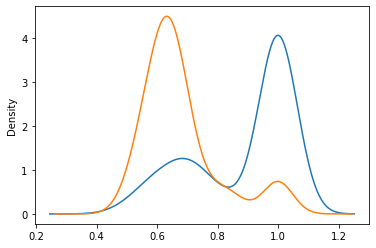

In [ ]:
df_find_threshold_test.loc[df_find_threshold_test['is_duplicate'] == 1]['distance'].plot.kde()
df_find_threshold_test.loc[df_find_threshold_test['is_duplicate'] == 0]['distance'].plot.kde()